# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### 1. The common procedure to set up a model:

In [2]:
geo_model = gp.create_model('Tutorial_ch1-7_Single_layer_topo')

gp.init_data(geo_model, extent=[440720, 441129, 69280,69689,-200,250],resolution = (50,50,50),
                         path_i = os.pardir+"/data/input_data/tut-ch1-7/onelayer_interfaces.csv",
                         path_o = os.pardir+"/data/input_data/tut-ch1-7/onelayer_orient.csv")



Tutorial_ch1-7_Single_layer_topo  2019-04-30 08:26

In [3]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Basement,1,True,#88cc60,2


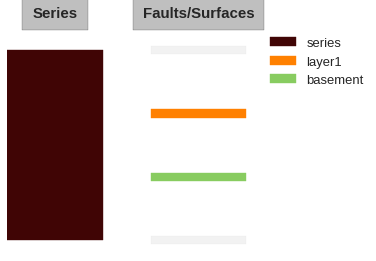

In [4]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

### 2. Adding topography

#### 2.b create fun topography

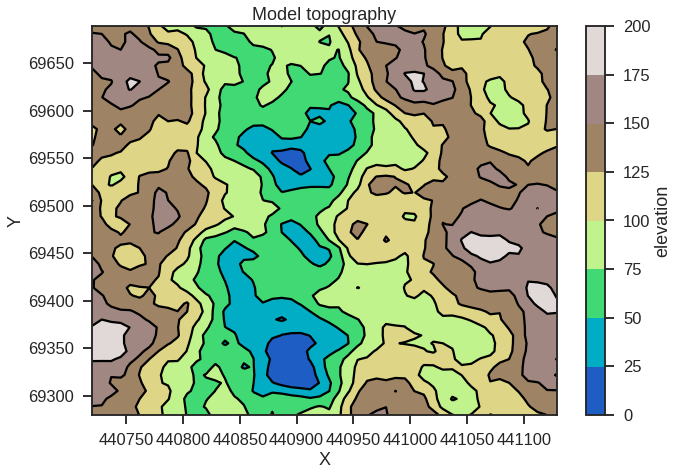

In [22]:
geo_model.set_topography(d_z=np.array([0,200]))

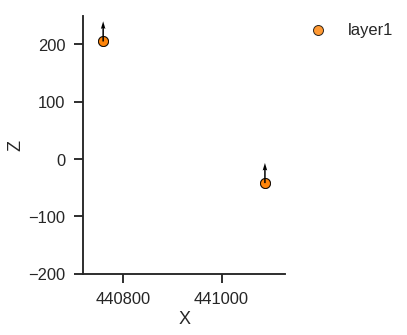

In [6]:
gp.plot.plot_data(geo_model)

#### 2 a. Load from raster file

In [7]:
fp = os.pardir+"/input_data/bogota.tif"

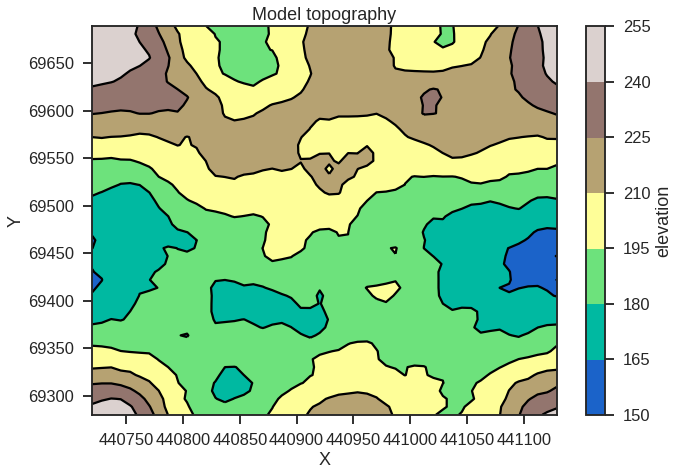

In [8]:
geo_model.grid.set_topography()

In [9]:
#geo_model.grid.topography.load_from_gdal(filepath=fp)

In [10]:
#geo_model.set_topography(source='gdal',filepath=fp)

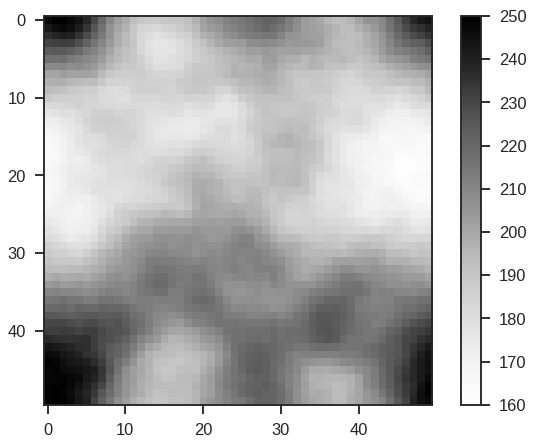

In [11]:
plt.imshow(geo_model.grid.topography.topo.dem_zval)
plt.colorbar()

In [12]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [13]:
geo_model.grid.regular_grid.mask_topo.shape

(50, 50, 50)

In [14]:
geo_model

Tutorial_ch1-7_Single_layer_topo  2019-04-30 08:26

In [24]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [16]:
geo_model.solutions.mask_matrix

array([[ True,  True,  True, ...,  True,  True,  True]])

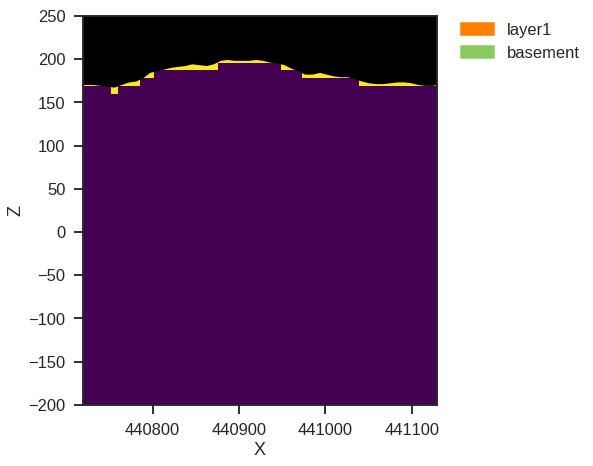

In [17]:
gp.plot.plot_section(geo_model, 25, direction='y', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=True)

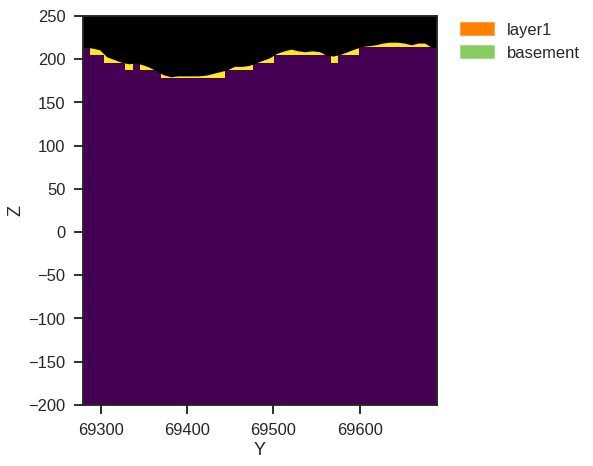

In [18]:
gp.plot.plot_section(geo_model, 25, direction='x', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=True)


In [25]:
gp.plot.plot_3D(geo_model)

closing vtk


In [ ]:
sol2 = gp.compute_model_at(geo_model.grid.topography.values, geo_model, compute_mesh=False)

In [ ]:
from gempy.plot.visualization_2d import PlotData2D

In [ ]:
plot=PlotData2D(geo_model)

In [ ]:
plot.plot_map(sol2)

In [ ]:
geo_model.grid.resolution

In [ ]:
geo_model.surfaces.modify_order_surfaces(1,0)

In [ ]:
sol = gp.compute_model(geo_model, compute_mesh=False)

In [ ]:
sol.lith_block.shape

In [ ]:
geo_model.series

In [ ]:
geo_model.surfaces

In [ ]:
import copy

In [ ]:
old_grid = copy.copy(geo_model.grid)

In [ ]:
old_grid.values.shape

In [ ]:
sol = gp.compute_model_at(old_grid.values, geo_model, compute_mesh=False)

In [ ]:
geo_model.interpolator.set_initial_results_matrices()

In [ ]:
sol.grid.values.shape

In [ ]:
geo_model.solutions.grid.resolution

In [ ]:
sol2.lith_block.shape

In [ ]:
plt.imshow(sol2.lith_block.reshape(50,50),origin='upper')

In [ ]:
sol2.grid.values.shape

In [ ]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=42, block=geo_model.solutions.lith_block,
                         direction='y', plot_data=True,show_faults=False)

In [ ]:
geo_model.topography._line_in_section()